# Factors that influence the salary (wages, earning)
Exam Example

Enter your name here:

## Name: AL

## First Name: AIN
    

We are given one-hot encoded panel data on earnings of 595 individuals for the years 1976–1982, originating from the [Panel Study of Income Dynamics](https://rdrr.io/cran/AER/man/PSID7682.html). The data were originally analyzed by Cornwell and Rupert (1988) and employed for assessing various instrumental-variable estimators for panel models.

**Your task is to predict the earnings class (`wage_class`) based on the remaining features.**

In [65]:
%%html
<style> |
table td, table th, table tr {text-align:left !important;}
</style>

A data frame containing 7 annual observations on 12 variables for 595 individuals.


| feature | description |
| --------| -------------|
| `experience` | Years of full-time work experience |
| `weeks` | Weeks worked |
| ` education` | Years of education. |
| `occupation_white` | factor. Is the individual a white-collar ("white"=`True`) or blue-collar ("blue"=`False`) worker? |
| `industry` | factor. Does the individual work in a manufacturing industry? |
| `south_yes` |factor. Does the individual reside in the South? |
| `smsa_yes` |factor. Does the individual reside in a SMSA (standard metropolitan statistical area)? |
| `married_yes` |factor. Is the individual married? |
| `gender_male` | factor indicating a male gender. |
| `union_yes` | factor. Is the individual's wage set by a union contract? |
| `ethnicity_other` |factor indicating ethnicity. Is the individual African-American ("afam") or not ("other")? |
| `wage_class` | **resopnse** $y$: Wage class (`['average, 'high', 'low', 'very high']`) |






Here, we import the necessary libraries.


In [66]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Evaluation & CV Libraries
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV


In [67]:
df_onehot=pd.read_csv('PSID_earnings_onehot.csv', index_col=0)
#df.info()
df_onehot.head()

,experience,weeks,education,occupation_white,industry_yes,south_yes,smsa_yes,married_yes,gender_male,union_yes,ethnicity_other,wage_class
1,3,32,9,1,0,1,0,1,1,0,1,low
2,4,43,9,1,0,1,0,1,1,0,1,low
3,5,40,9,1,0,1,0,1,1,0,1,low
4,6,39,9,1,0,1,0,1,1,0,1,low
5,7,42,9,1,1,1,0,1,1,0,1,low


We check for missing values and NaN, and remove them.

In [68]:
#drop missing values
df_onehot.dropna(inplace=True)
df_onehot.isnull().sum()

experience          0
weeks               0
education           0
occupation_white    0
industry_yes        0
south_yes           0
smsa_yes            0
married_yes         0
gender_male         0
union_yes           0
ethnicity_other     0
wage_class          0
dtype: int64

### (a) Extract the features $X$ and the response (label, target) $y$ of the dataset

- generate a `numpy` array `X` that contains the features $X$.
- generate a `numpy` array `y` that contains the response $y$.


In [69]:
# START CODE HERE 
column_labels = list(df_onehot.head(0))

df_X = df_onehot[[lbl for lbl in column_labels if lbl != "wage_class"]]
df_Y = df_onehot["wage_class"]
X = df_X.to_numpy()
Y = df_Y.to_numpy()
X.shape, Y.shape
# END CODE HERE 

((4165, 11), (4165,))

### (b) Plot a histogram of the response $y$ (`'wage_class'`)
- Are the classes well balanced?
- Answer: ...

<AxesSubplot: >

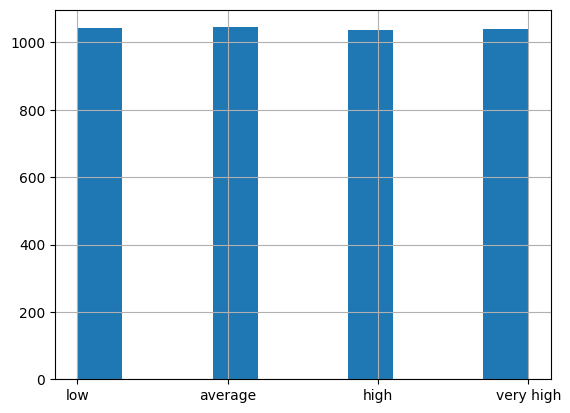

In [70]:
#START CODE HERE
df_Y.hist()
#END CODE HERE

### (c) Split the data in 80% training data and 20% test data


In [71]:
# Data Pre-processing Libraries
from sklearn.model_selection import train_test_split

# START CODE HERE 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# END CODE HERE 

((3332, 11), (3332,), (833, 11), (833,))

### (d) Use the `StandardScaler` to standardize the data

In [72]:
# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler

#START CODE HERE

scaler = StandardScaler()
print(x_train[:3,:])
scaler.fit(x_train)
print(x_train[:3,:])
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train[:3,:])
#END CODE HERE

[[ 7 48 12  0  1  1  1  0  1  1  1]
 [11 47 12  0  0  0  1  1  1  1  1]
 [20 49 12  0  1  0  1  1  1  1  1]]
[[ 7 48 12  0  1  1  1  0  1  1  1]
 [11 47 12  0  0  0  1  1  1  1  1]
 [20 49 12  0  1  0  1  1  1  1  1]]
[[-1.16739101  0.21867293 -0.30978657 -0.98569652  1.23150977  1.58814317
   0.71875835 -2.08320512  0.35771789  1.32170666  0.27609308]
 [-0.80257619  0.01981425 -0.30978657 -0.98569652 -0.81201142 -0.62966615
   0.71875835  0.48002954  0.35771789  1.32170666  0.27609308]
 [ 0.01825716  0.41753161 -0.30978657 -0.98569652  1.23150977 -0.62966615
   0.71875835  0.48002954  0.35771789  1.32170666  0.27609308]]


### (e) Model Evaluation

Use the following **classifiers as baseline** for your classification and evaluate the **precision** (macro average: `average='macro'`) on the training and test data for each of these classifiers

- Random Forest classifier (`RandomForestClassifier`) with standard parameters
- k-nearest neighbors classifier (`KNeighborsClassifier`) with `k=3`
  


In [73]:
# Modelling Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

classes=['average', 'high', 'low', 'very high']


Random Forest Classifier
Train Precision:	0.969
Test Precision:		0.528

KNN Classifier
Train Precision:	0.766
Test Precision:		0.498


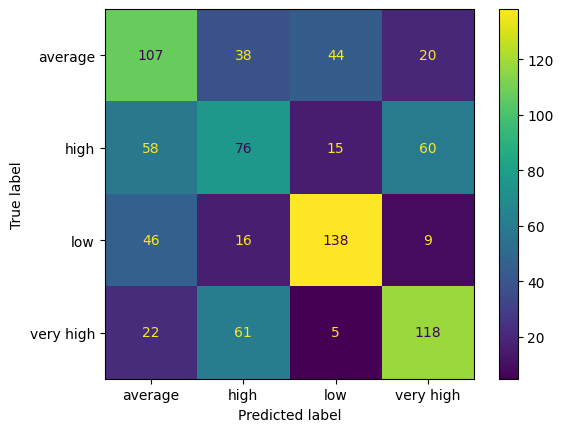

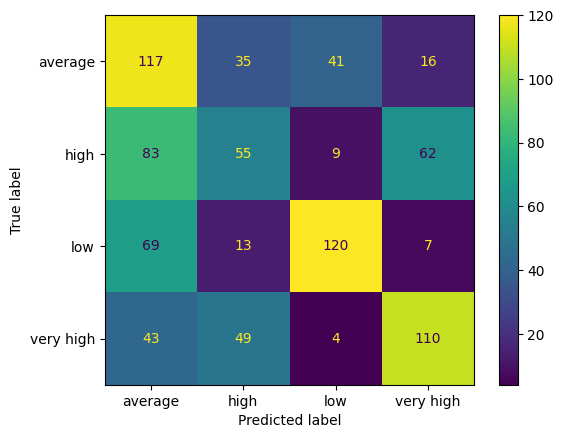

In [74]:
#START CODE HERE
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
yh_test = RFC.predict(x_test)
yh_train = RFC.predict(x_train)
rfc_train_prec = precision_score(y_train, yh_train, average='macro')
rfc_test_prec = precision_score(y_test, yh_test, average='macro')

knn = KNeighborsClassifier(3)

knn.fit(x_train, y_train)
yh_test = knn.predict(x_test)
yh_train = knn.predict(x_train)
knn_train_prec = precision_score(y_train, yh_train, average='macro')
knn_test_prec = precision_score(y_test, yh_test, average='macro')

print(f'Random Forest Classifier\n'
      f'Train Precision:\t{rfc_train_prec:.3f}\n'
      f'Test Precision:\t\t{rfc_test_prec:.3f}'
      f'\n\n'
      f'KNN Classifier\n'
      f'Train Precision:\t{knn_train_prec:.3f}\n'
      f'Test Precision:\t\t{knn_test_prec:.3f}')
ConfusionMatrixDisplay.from_estimator(RFC, x_test, y_test, labels=classes)
plt.show()
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=knn.classes_)
plt.show()


#END CODE HERE

### (f) Plot a confusion matrix for each classifier and interpret the results

Plot a **Confusion Matrix** for each of the two classifiers, e.g. using
   - `cm = confusion_matrix(y_test, y_pred, labels=model.classes_)`
   - ` disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)`
   

Enter your comments in at least two sentences here:
- ...
- ...

###  (g) Hyperparameter Tuning of random forest

- Tune the hyperparameters a Random Forest Classifier `RandomForestClassifier()` using a 10-fold crossvalidated grid search using `GridSearchCV`. 
- Use the following hyperparameters for your grid search:
    - `params= {'n_estimators':[10,50,100,200], 'max_depth':list(range(1,7))}`
- Use the F1 (`f1_macro`) score as a metric.
- What are the best parameters out of the grid?

In [75]:
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
params= {'n_estimators':[10,50,100,200],
         'max_depth':list(range(1,7))}

In [76]:
from sklearn.model_selection import cross_val_score

#START CODE HERE

clf= GridSearchCV(RandomForestClassifier(), params,scoring='f1_macro', n_jobs=-1,cv=10)
clf.fit(x_train, y_train)

print(f"{'Best parameters':-^51s}")
for key in clf.best_params_.keys():
    if not isinstance(clf.best_params_[key],str):
        value = str(clf.best_params_[key])
    else:
        value = clf.best_params_[key]

    print(f"{key:30s}:{value:20s}")
print(51*"-")

#END CODE HERE


------------------Best parameters------------------
max_depth                     :6                   
n_estimators                  :100                 
---------------------------------------------------


### (h) Compute and plot the permutation feature importances of the best tuned random forest classifier
- What are the most important factors for a high salary?


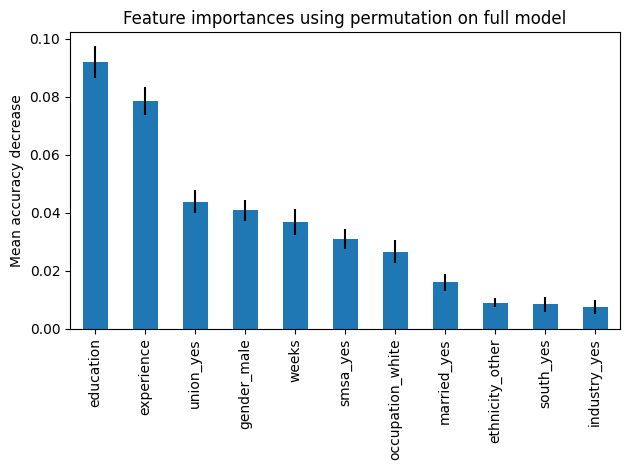

In [77]:
from sklearn.inspection import permutation_importance

#START CODE HERE 
modl = clf.best_estimator_
importances = permutation_importance(modl, x_train, y_train,n_jobs=-1, n_repeats=10,random_state=42)

forest_importances = pd.Series(importances.importances_mean, index=column_labels[:-1])

sort_index = np.argsort(forest_importances)[::-1]

fig, ax = plt.subplots()
forest_importances[sort_index].plot.bar(yerr=importances.importances_std[sort_index], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#END CODE HERE


###  (i) Hyperparameter Tuning of kNN

- Hypertune a K-nearest neighbour classifier `KNeighborsClassifier()` using a 10-fold crossvalidated grid search. 
- Use the following parameters for your grid search:
    - `params= {'n_neighbors':list(range(20,50))}`
- Use the F1 score (`scoring=f1_macro`) as a metric.
- What are the best parameters for the number of neighbours?

In [78]:
knn=KNeighborsClassifier()
params= {'n_neighbors':list(range(20,50))}

In [79]:
#START CODE HERE
clf= GridSearchCV(KNeighborsClassifier(), params,scoring='f1_macro', n_jobs=-1,cv=10)
clf.fit(x_train, y_train)

print(f"{'Best parameters':-^51s}")
for key in clf.best_params_.keys():
    if not isinstance(clf.best_params_[key],str):
        value = str(clf.best_params_[key])
    else:
        value = clf.best_params_[key]

    print(f"{key:30s}:{value:20s}")
print(51*"-")

#END CODE HERE


------------------Best parameters------------------
n_neighbors                   :25                  
---------------------------------------------------


### (j) Compare and discuss the different approaches

- Considering the classifiers (e/f) where the hyperparameters were not tuned and those where the hyperparameters were tuned (g/i), respectively, which classifier would you recommend and why?

Answers:
- ...
- ... 

## Upload this notebook as ipynb-File and as html-File (File  →  Download as  →  HTML) to the upload field of this question (2 files are allowed). 